In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
amzf = pd.read_csv('amazon_fires.csv', encoding = 'ISO-8859-10')
amzf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ano       6454 non-null   int64 
 1   mes       6454 non-null   object
 2   estado    6454 non-null   object
 3   numero    6322 non-null   object
 4   encontro  6454 non-null   object
dtypes: int64(1), object(4)
memory usage: 252.2+ KB


In [3]:
amzf.sample(5)

,ano,mes,estado,numero,encontro
4718,2014,Setembro,Rio,30,1/1/2014
883,2003,Setembro,Amazonas,1.401,1/1/2003
71,2009,Abril,Acre,0 Fires,1/1/2009
5808,2009,Abril,Sao Paulo,67,1/1/2009
2306,2012,Agosto,Maranhao,10.395,1/1/2012


In [5]:
amzf.columns
re_col_data = {'ano':'year', 'mes':'month', 'estado':'state', 'numero':'no_of_fires', 'encontro':'date'}

amzf.rename(columns = re_col_data, inplace = True)

amzf.head(10)

,year,month,state,no_of_fires,date
0,1998,Janeiro,Acre,0 Fires,1/1/1998
1,1999,Janeiro,Acre,0 Fires,1/1/1999
2,2000,Janeiro,Acre,0 Fires,1/1/2000
3,2001,Janeiro,Acre,0 Fires,1/1/2001
4,2002,Janeiro,Acre,0 Fires,1/1/2002
5,2003,Janeiro,Acre,10 Fires,1/1/2003
6,2004,Janeiro,Acre,0 Fires,1/1/2004
7,2005,Janeiro,Acre,12 Fires,1/1/2005
8,2006,Janeiro,Acre,4 Fires,1/1/2006
9,2007,Janeiro,Acre,0 Fires,1/1/2007


In [9]:
amzf['no_of_fires'].unique()

amzf['no_of_fires'] = amzf['no_of_fires'].str.strip('Fires')
amzf['no_of_fires'].unique()

amzf['no_of_fires'].isna().value_counts()

amzf.dropna(inplace = True)

amzf['no_of_fires'] = amzf['no_of_fires'].astype(float)
amzf['no_of_fires'] = amzf['no_of_fires'].astype(int)

amzf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6322 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   year         6322 non-null   int64 
 1   month        6322 non-null   object
 2   state        6322 non-null   object
 3   no_of_fires  6322 non-null   int64 
 4   date         6322 non-null   object
dtypes: int64(2), object(3)
memory usage: 296.3+ KB


In [12]:
amzf.reset_index(inplace = True)
amzf

amzf.drop(columns = 'index', inplace = True)
amzf.head(10)

,level_0,year,month,state,no_of_fires,date
0,0,1998,Janeiro,Acre,0,1/1/1998
1,1,1999,Janeiro,Acre,0,1/1/1999
2,2,2000,Janeiro,Acre,0,1/1/2000
3,3,2001,Janeiro,Acre,0,1/1/2001
4,4,2002,Janeiro,Acre,0,1/1/2002
5,5,2003,Janeiro,Acre,10,1/1/2003
6,6,2004,Janeiro,Acre,0,1/1/2004
7,7,2005,Janeiro,Acre,12,1/1/2005
8,8,2006,Janeiro,Acre,4,1/1/2006
9,9,2007,Janeiro,Acre,0,1/1/2007


In [13]:
amzf['date'] = pd.to_datetime(amzf['date'])
amzf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6322 entries, 0 to 6321
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   level_0      6322 non-null   int64         
 1   year         6322 non-null   int64         
 2   month        6322 non-null   object        
 3   state        6322 non-null   object        
 4   no_of_fires  6322 non-null   int64         
 5   date         6322 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 296.5+ KB


In [15]:
fires_year = amzf.groupby('year')['no_of_fires'].sum()
fires_year
fires_year = fires_year.reset_index()

fires_year

,year,no_of_fires
0,1998,20151
1,1999,24072
2,2000,26427
3,2001,28823
4,2002,37820
5,2003,42264
6,2004,40161
7,2005,35887
8,2006,36163
9,2007,33205


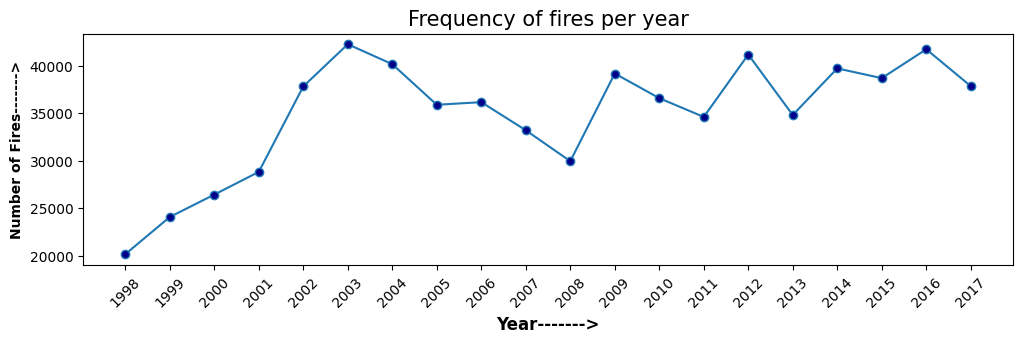

In [17]:
plt.figure(figsize=(12,3))
plt.title('Frequency of fires per year', fontsize = 15)

plt.plot(fires_year['year'],fires_year['no_of_fires'], marker = 'o', markerfacecolor = 'darkblue')
plt.xticks(np.arange(1998,2018), rotation = 45)
plt.xlabel('Year------->', fontsize = 12, fontweight = 600)
plt.ylabel('Number of Fires------->', fontsize = 10, fontweight = 600)
plt.show()

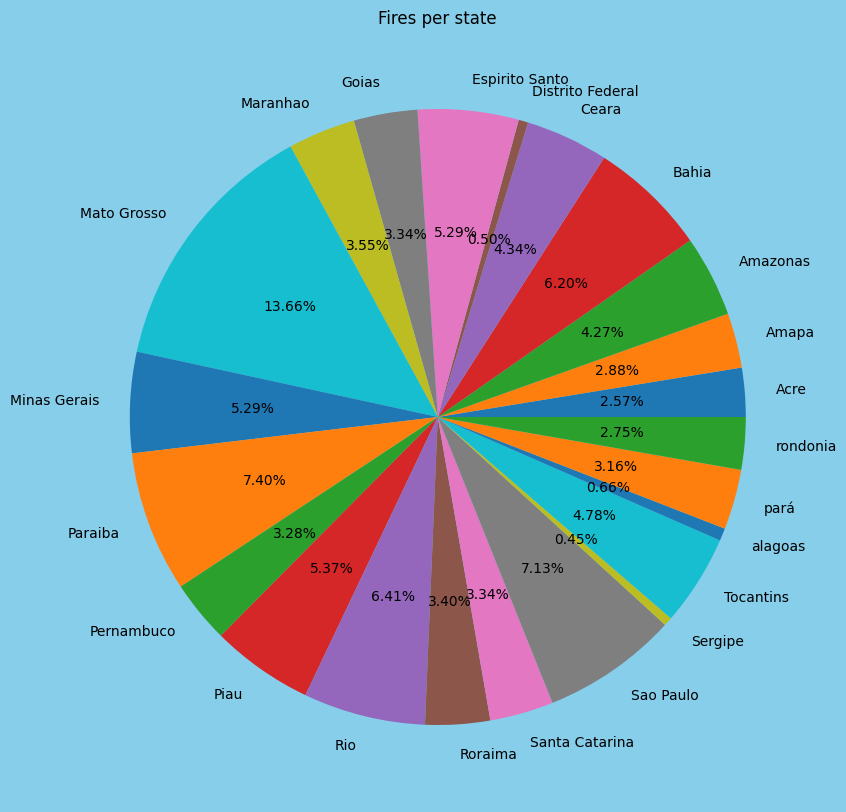

In [18]:
amzf['state'].value_counts()

fires_state = amzf.groupby('state')['no_of_fires'].sum().reset_index()
fires_state

plt.figure(figsize=(10,10),facecolor='skyblue')

plt.pie(fires_state['no_of_fires'],labels=fires_state['state'],autopct='%0.2f%%')
plt.title('Fires per state')

plt.show()

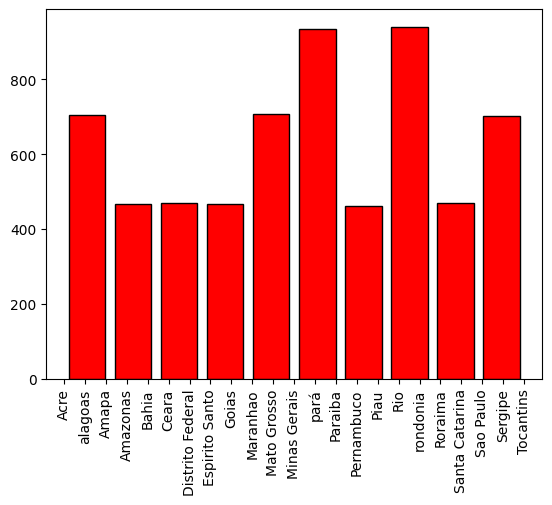

In [19]:
plt.hist(amzf['state'],edgecolor='black',rwidth=0.8, color = 'red')
plt.xticks(rotation=90)

plt.show()

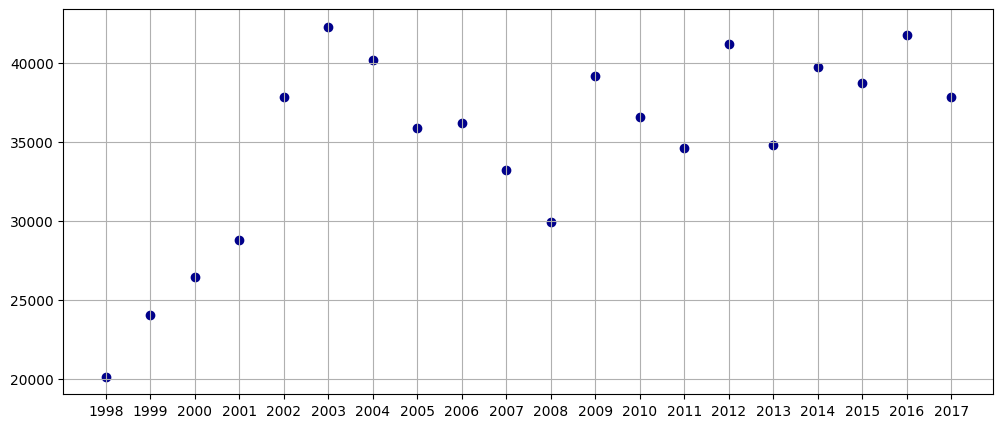

In [20]:
plt.figure(figsize=(12,5))
plt.scatter(fires_year['year'],fires_year['no_of_fires'], color = 'darkblue')
plt.xticks(np.arange(1998,2018))
plt.grid()
plt.show()

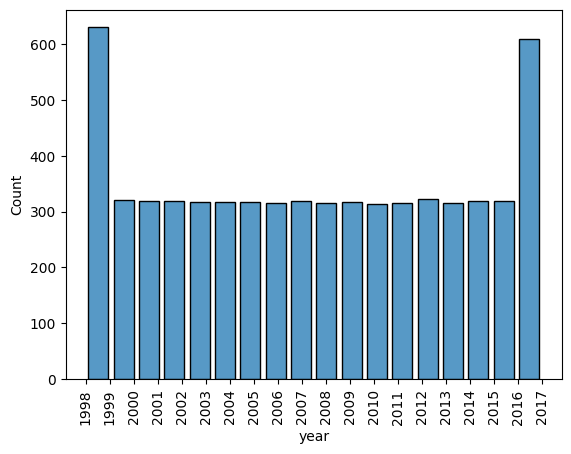

In [21]:
sns.histplot(x= amzf['year'],data = amzf,shrink=0.8) # occurence of each year in the data set.
plt.xticks(np.arange(1998,2018),rotation=90)
plt.show()

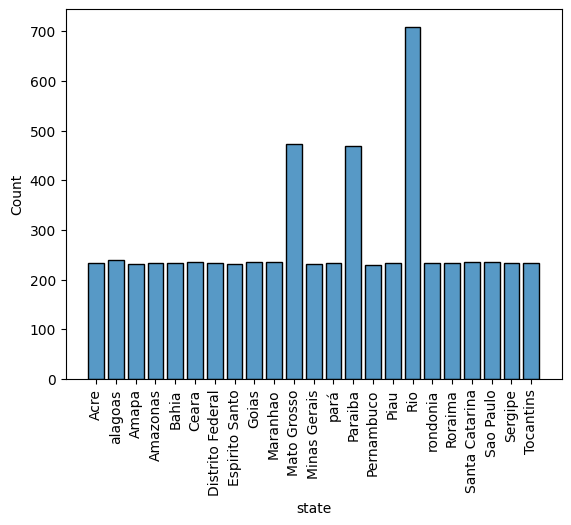

In [22]:
sns.histplot(x= amzf['state'],data = amzf,shrink=0.8) # occurence of each state in the data-set.
plt.xticks(rotation=90)
plt.show()

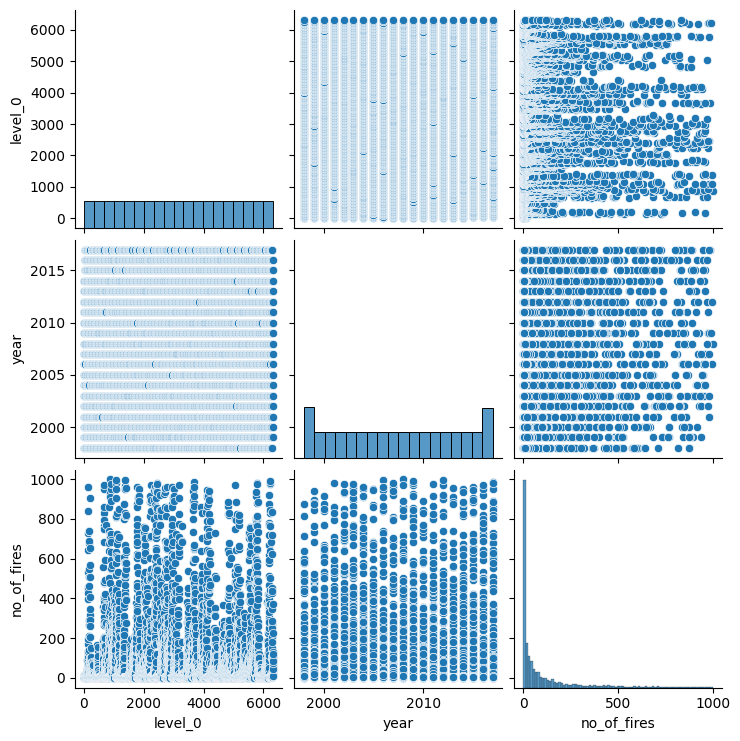

In [23]:
sns.pairplot(amzf) # it takes all the numeric columns and makes a NxN grid. N=no. of numeric columns

<Axes: >

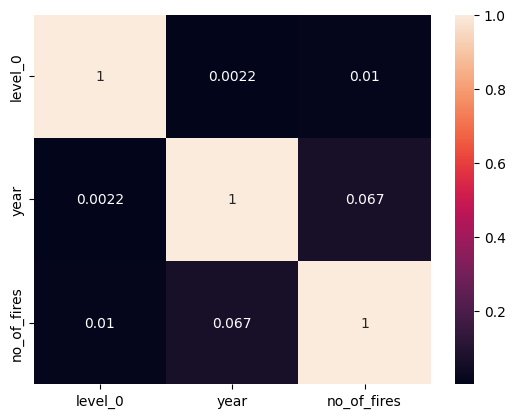

In [24]:
corr_mat = amzf.corr(numeric_only=True)
corr_mat

sns.heatmap(corr_mat,annot =True) # not effective as only 2 numeric columns are there

/tmp/ipython-input-3755719182.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_f_month, x='month', y='no_of_fires', order=month_order, palette='viridis')


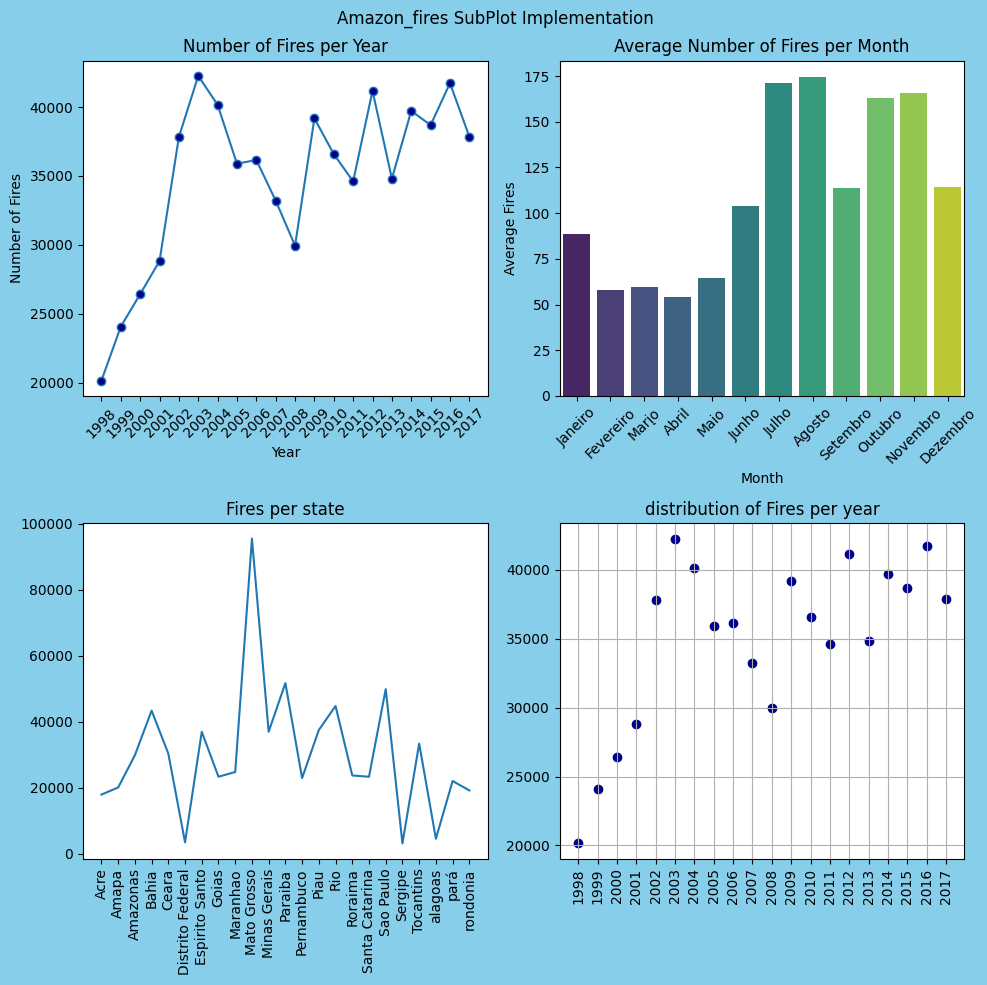

In [25]:
plt.figure(figsize=(10,10),facecolor='skyblue')
plt.suptitle('Amazon_fires SubPlot Implementation')

plt.subplot(2,2,1)
plt.plot(fires_year['year'],fires_year['no_of_fires'], marker = 'o',markerfacecolor='darkblue')
plt.title('Number of Fires per Year')
plt.xticks(np.arange(1998,2018), rotation = 45)
plt.xlabel('Year')
plt.ylabel('Number of Fires')

plt.subplot(2,2,2)
avg_f_month = amzf.groupby('month')['no_of_fires'].mean().reset_index()
#  1. Define the correct chronological order for Portuguese months
month_order = [
    'Janeiro', 'Fevereiro', 'Marįo', 'Abril', 'Maio', 'Junho',
    'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'
]
sns.barplot(data=avg_f_month, x='month', y='no_of_fires', order=month_order, palette='viridis')
plt.title('Average Number of Fires per Month')
plt.xlabel('Month')
plt.ylabel('Average Fires')
plt.xticks(rotation=45)

plt.subplot(2,2,3)
plt.plot(fires_state['state'],fires_state['no_of_fires'])
plt.xticks(rotation=90)
plt.title('Fires per state')

plt.subplot(2,2,4)
plt.scatter(fires_year['year'],fires_year['no_of_fires'], color = 'darkblue')
plt.title('distribution of Fires per year')
plt.xticks(np.arange(1998,2018),rotation=90)
plt.grid()

plt.tight_layout()
plt.show()